## Observations and Insights 
    1. The correlation between mouse weight and average tumor volume (mm3) was 0.84, which shows there is a positive correlation between mouse weight and average tumor volume (mm3)
    2. the drug regimens Capimulin and Ramicane were the most successful drugs in the shrinkage of tumor volume (mm3) in the mice
    3. The regimens Capimulin and Ramicane have the most data points per drug treatment regimen, while the other regimens have relatively the same number of data points per drug treatment regimen. 

In [21]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [22]:
# Checking the number of mice.
Total_mouse = len(combined_data["Mouse ID"].unique())

Total_mouse

249

In [23]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse = combined_data.loc[combined_data.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()

duplicate_mouse

array(['g989'], dtype=object)

In [24]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_id = combined_data.set_index('Mouse ID')
g989 = mouse_id.loc['g989',:]
g989

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,5,48.786801,0
g989,Propriva,Female,21,26,5,47.570392,0
g989,Propriva,Female,21,26,10,51.745156,0
g989,Propriva,Female,21,26,10,49.880528,0
g989,Propriva,Female,21,26,15,51.325852,1
g989,Propriva,Female,21,26,15,53.442020,0
g989,Propriva,Female,21,26,20,55.326122,1


In [25]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = combined_data[combined_data['Mouse ID'].isin(duplicate_mouse) == False]

clean_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [26]:
# Checking the number of mice in the clean DataFrame.
clean_mouse_count = len(clean_data["Mouse ID"].unique())

clean_mouse_count

248

## Summary Statistics

In [27]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
regimen_group = clean_data.groupby('Drug Regimen')

# Mean
regimen_mean = regimen_group['Tumor Volume (mm3)'].mean()

# Median
regimen_median = regimen_group['Tumor Volume (mm3)'].median()

# Variance
regimen_var = regimen_group['Tumor Volume (mm3)'].var()

# Standard Deviarion
regimen_std = regimen_group['Tumor Volume (mm3)'].std()

# SEM
regimen_sem = regimen_group['Tumor Volume (mm3)'].sem()

# Create DataFrame
Summary_Stats = pd.DataFrame({"Mean":regimen_mean, "Median":regimen_median, "Variance":regimen_var, "Standard Deviation":regimen_std, "SEM":regimen_sem})

Summary_Stats


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [28]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

regimen_stats = regimen_group.agg(['mean', 'median', 'var', 'std', 'sem'])['Tumor Volume (mm3)']

regimen_stats

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

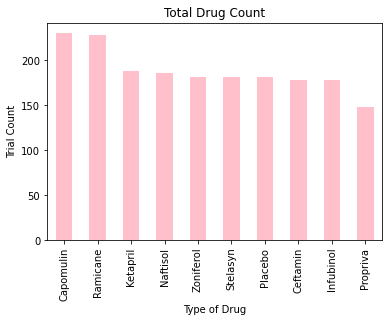

In [29]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
treatment_count = clean_data['Drug Regimen'].value_counts()

# Axis
y_axis = treatment_count.values
x_axis = treatment_count.index


# Create type of graph
treatment_count.plot(kind="bar", facecolor='pink')

# Format
plt.xlabel('Type of Drug')
plt.ylabel("Trial Count")
plt.title('Total Drug Count')
plt.show()

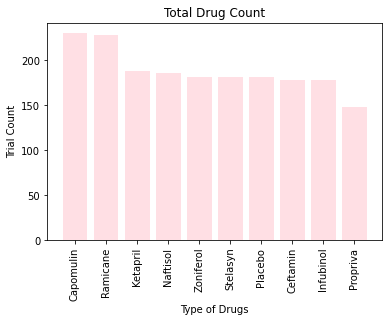

In [30]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
treatment_count = clean_data['Drug Regimen'].value_counts()

# Axis
x_val = treatment_count.index
x_axis = np.arange(0, len(y_axis),1)
y_axis = treatment_count.values

# Pyplot graph
plt.bar(x_val, y_axis, color= 'pink', alpha= 0.5, align= "center")

# Format
plt.xlabel('Type of Drugs')
plt.ylabel('Trial Count')
plt.title('Total Drug Count')
plt.xticks(rotation=90)

plt.show()

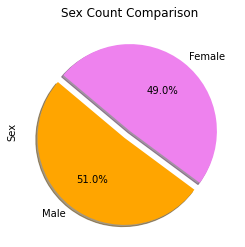

In [31]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

# Male and Female Count
sex_count = clean_data['Sex'].value_counts()

# Colors
colors = ['orange', 'violet']

# Detach
explode = (0.1, 0)

# Make pie chart
sex_count.plot(kind='pie', explode= explode, colors= colors, shadow= True, startangle= 140, autopct="%1.1f%%")

# Format
plt.title("Sex Count Comparison")
plt.show()

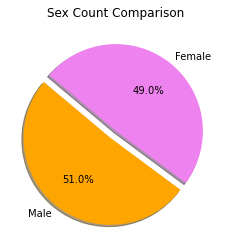

In [32]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Labels
labels = ['Male', 'Female']

# Colors
colors = ['orange', 'violet']

# Detach
explode = (0.1,0)

# Create pie chart
plt.pie(sex_count, explode= explode, labels= labels, startangle= 140, colors= colors, autopct= "%1.1f%%", shadow= True)

# Format
plt.title("Sex Count Comparison")
plt.show()

## Quartiles, Outliers and Boxplots

In [33]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Start by getting the last (greatest) timepoint for each mouse
greatest_timepoint = clean_data.groupby('Mouse ID').max()['Timepoint']

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
mouse_merge = pd.merge(clean_data, greatest_timepoint, how = 'right', on= ['Mouse ID', 'Timepoint'])
mouse_volume = mouse_merge[['Mouse ID', 'Drug Regimen', 'Timepoint', 'Tumor Volume (mm3)']]
# Capomulin
capomulin_df = clean_data.loc[clean_data['Drug Regimen'] == "Capomulin", :]
#  Ramicane
ramicane_df = clean_data.loc[clean_data['Drug Regimen'] == "Ramicane", :]
# Infubinol
infubinol_df = clean_data.loc[clean_data['Drug Regimen'] == "Infubinol", :]
# Ceftamin
ceftamin_df = clean_data.loc[clean_data['Drug Regimen'] == "Ceftamin", :]


In [34]:
# Put treatments into a list for for loop (and later for plot labels)
drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin' ]

# Create empty list to fill with tumor vol data (for plotting)
volume_data = []


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    # Determine outliers using upper and lower bounds

# For loop
for drug in drugs:
    tumor_volume = mouse_volume.loc[mouse_volume['Drug Regimen'] == drug, 'Tumor Volume (mm3)']

    volume_data.append(tumor_volume)

    quartiles = tumor_volume.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    IQR = round(upperq-lowerq, 2)
    lower_bound = lowerq - (1.5*IQR)
    upper_bound = upperq + (1.5*IQR)

    print(f"--------------------------------------------------------")
    print(f"{drug} IQR data is:")
    print(f"The lower quartile of {drug} is: {lowerq}")
    print(f"The upper quartile of {drug} is: {upperq}")
    print(f"The interquartile range of {drug} is: {IQR}")
    print(f"The the median of {drug} is: {quartiles[0.5]} ")
    print(f"Values below {lower_bound} for {drug} could be outliers.")
    print(f"Values above {upper_bound} for {drug} could be outliers.")
    print(f"--------------------------------------------------------")


    

--------------------------------------------------------
Capomulin IQR data is:
The lower quartile of Capomulin is: 32.37735684
The upper quartile of Capomulin is: 40.1592203
The interquartile range of Capomulin is: 7.78
The the median of Capomulin is: 38.125164399999996 
Values below 20.707356839999996 for Capomulin could be outliers.
Values above 51.8292203 for Capomulin could be outliers.
--------------------------------------------------------
--------------------------------------------------------
Ramicane IQR data is:
The lower quartile of Ramicane is: 31.56046955
The upper quartile of Ramicane is: 40.65900627
The interquartile range of Ramicane is: 9.1
The the median of Ramicane is: 36.56165229 
Values below 17.910469550000002 for Ramicane could be outliers.
Values above 54.30900627 for Ramicane could be outliers.
--------------------------------------------------------
--------------------------------------------------------
Infubinol IQR data is:
The lower quartile of Infubin

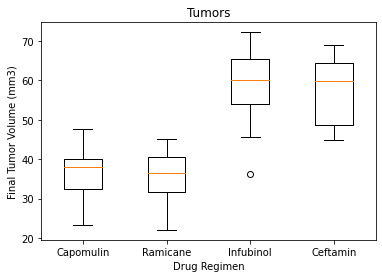

In [35]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.title('Tumors')
plt.ylabel('Final Tumor Volume (mm3)')
plt.xlabel('Drug Regimen')

plt.boxplot(volume_data, labels=drugs)

plt.show()


## Line and Scatter Plots

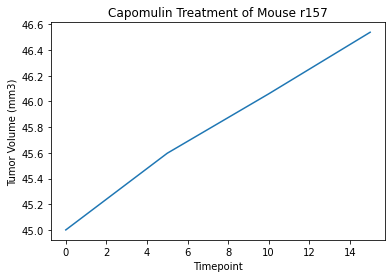

In [36]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
mouse= clean_data.loc[clean_data['Mouse ID'] == 'r157']


plt.plot(mouse["Timepoint"], mouse["Tumor Volume (mm3)"])
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment of Mouse r157")
plt.show()

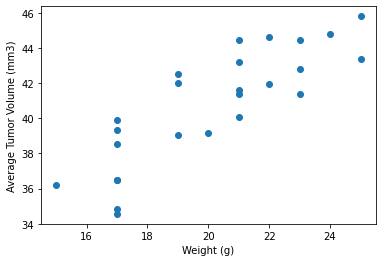

In [37]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_average = capomulin_df.groupby(['Mouse ID']).mean()
plt.scatter(capomulin_average['Weight (g)'],capomulin_average['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.show()



## Correlation and Regression

In [38]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = round(st.pearsonr(capomulin_average['Weight (g)'],capomulin_average['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and average tumor volume is {correlation}")

The correlation between mouse weight and average tumor volume is 0.84


In [39]:
# Values
values = st.linregress(capomulin_average['Weight (g)'],capomulin_average['Tumor Volume (mm3)'])
values

LinregressResult(slope=0.9544396890241045, intercept=21.552160532685015, rvalue=0.8419363424694718, pvalue=1.3225722434712642e-07, stderr=0.1275435903320134)

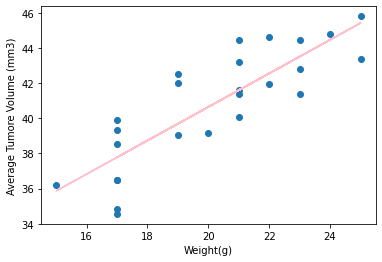

In [40]:
# Graph
m_slope = 0.9544396890241045
b_intercept = 21.552160532685015

y_val = capomulin_average['Weight (g)'] * m_slope + b_intercept
plt.scatter(capomulin_average['Weight (g)'],capomulin_average['Tumor Volume (mm3)'])
plt.plot(capomulin_average['Weight (g)'], y_val, color="pink")
plt.xlabel('Weight(g)')
plt.ylabel('Average Tumore Volume (mm3)')

plt.show()
